# Blue Coat log analysis notebook
=================================================

## Loading the logs as tables from parquet files in HDFS

The following code loads the access logs from the BlueCoat/accesslog directory in the user's HDFS directory and makes them available as a table.

'data' is a dataframe that contains rows selected by the SQL query.

In [44]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

if __name__ == '__main__':
    sqlContext = SQLContext(sc)

    df = sqlContext.load('BlueCoat/accessLog')
    sqlContext.registerDataFrameAsTable(df, "accesslog")
    df2 = sqlContext.load('reputation/alienvault')
    sqlContext.registerDataFrameAsTable(df2, 'av')
    data = sqlContext.sql("SELECT clientip, username, host, categories, count(*) as hits FROM accesslog JOIN av WHERE host=ip GROUP BY clientip, username, host, categories ORDER BY hits DESC") 
    data.cache()
    data.show()

clientip       username           host            categories           hits
10.31.5.110    -                  178.162.214.36  TV/Video\ Streams    10  
10.22.4.199    sbedouet           141.105.71.93   none                 10  
10.39.20.21    -                  198.204.248.250 none                 9   
10.18.6.210    DVIonescu          141.105.71.93   none                 9   
10.39.20.21    EMEACRC            198.204.248.250 none                 9   
10.18.6.210    -                  141.105.71.93   none                 9   
10.192.89.177  yin.li             115.238.166.150 Audio/Video\ Clips   8   
10.192.89.177  yin.li             115.238.166.151 Audio/Video\ Clips   8   
10.128.26.129  ngodin             192.64.174.163  none                 5   
10.44.4.44     -                  195.154.162.187 none                 5   
10.2.5.180     amametz            5.79.73.209     Audio/Video\ Clips   2   
10.35.3.123    -                  195.154.162.197 none                 2   
10.5.40.15  

## Plotting a pie chart from the data
The following code uses the 'matplotlib' to draw a pie chart from 'data'

([<matplotlib.patches.Wedge at 0x5276690>,
  <matplotlib.text.Text at 0x5274350>])

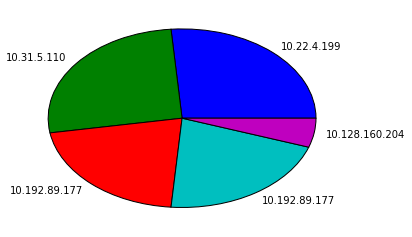

In [42]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

clientip = []
hits = []
for i in data.take(5):
    hits.append(i.hits)
    clientip.append(i.clientip)

plt.pie(hits, labels=clientip)

## Plotting a bar graph from the data
The following code uses the 'matplotlib' to draw a pie chart from 'data'

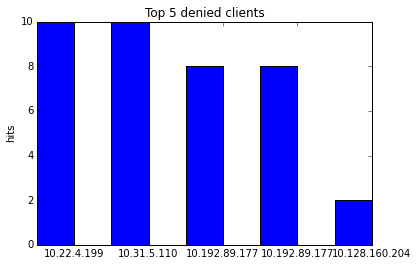

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  

clientip = []
hits = []
for i in data.take(5):
    hits.append(i.hits)
    clientip.append(i.clientip)
    
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.5     # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, hits, width, color='b')

# add some
ax.set_ylabel('hits')
ax.set_title('Top 5 denied clients')
ax.set_xticks(ind+width)
ax.set_xticklabels(clientip)


In [ ]:
!ls